In [32]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [33]:
# load the dataset
df = pd.read_csv("D://M_AI//Machine Learning//Projects//insurance2.csv")
df.shape

(1338, 8)

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [35]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [36]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

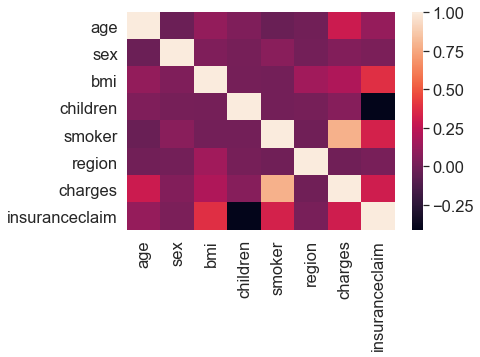

In [37]:
# check the correlation using the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr())

In [38]:
# finding correlation values
corr = df.corr()
print(corr)

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

In [39]:
used_features = ['age','sex','bmi','children','smoker','region','charges']
X = df[used_features]
y = df.insuranceclaim

In [40]:
# split train and test data sets
X_Train,X_test,y_Train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

print(X_Train.shape)
print(X_test.shape)
print(y_Train.shape)
print(y_test.shape)

(936, 7)
(402, 7)
(936,)
(402,)


In [41]:
# Normalizing the inputs
means = np.mean(X_Train, axis=0)
stds = np.std(X_Train, axis=0)

X_Train = (X_Train - means)/stds
X_test = (X_test - means)/stds

In [42]:
# call logistic regression 
logReg = LogisticRegression()
logReg.fit(X_Train,y_Train)

# print coefficients and intercepts
print(logReg.coef_)
print(logReg.intercept_)

[[ 0.41227169  0.06075026  1.49445582 -1.65580352  1.51012481 -0.14595571
   0.09028936]]
[0.67687558]


In [43]:
y_pred = logReg.predict(X_test)

In [44]:
# confusion matrix
metrics.confusion_matrix(y_test,y_pred)

array([[123,  33],
       [ 20, 226]], dtype=int64)

In [45]:
# finding the accuracy of the model
metrics.accuracy_score(y_test,y_pred)

0.8681592039800995

In [46]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       156
           1       0.87      0.92      0.90       246

    accuracy                           0.87       402
   macro avg       0.87      0.85      0.86       402
weighted avg       0.87      0.87      0.87       402



In [47]:
# predict insurance claim probability
logReg.predict_proba(X_test)

array([[6.18196685e-01, 3.81803315e-01],
       [9.61572650e-01, 3.84273497e-02],
       [7.54772872e-01, 2.45227128e-01],
       [9.62532666e-03, 9.90374673e-01],
       [3.48227326e-01, 6.51772674e-01],
       [5.06542612e-01, 4.93457388e-01],
       [4.83648053e-01, 5.16351947e-01],
       [8.10095911e-01, 1.89904089e-01],
       [2.22115596e-01, 7.77884404e-01],
       [2.39305723e-01, 7.60694277e-01],
       [1.22806572e-01, 8.77193428e-01],
       [2.27861447e-02, 9.77213855e-01],
       [4.09361636e-02, 9.59063836e-01],
       [7.54023557e-01, 2.45976443e-01],
       [4.28025727e-01, 5.71974273e-01],
       [7.83251723e-02, 9.21674828e-01],
       [2.36295789e-01, 7.63704211e-01],
       [7.07533630e-01, 2.92466370e-01],
       [6.86970453e-01, 3.13029547e-01],
       [3.14577821e-02, 9.68542218e-01],
       [1.83277605e-01, 8.16722395e-01],
       [2.94692583e-01, 7.05307417e-01],
       [1.76131725e-01, 8.23868275e-01],
       [9.59306261e-01, 4.06937390e-02],
       [6.329565

Text(0.5, 0, 'Importance')

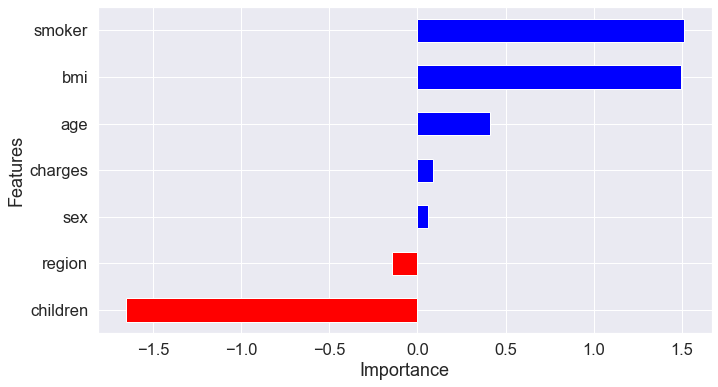

In [49]:
#  Different features vs Insurance Claim behaviour
labels = list(X)
coeff = list(logReg.coef_[0])

features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')